In [1]:
import struct
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

In [2]:
with open("traces-sc128-10000-6100.bin", "rb") as f:
    N, = struct.unpack('<I', f.read(4))
    print(f"N: {N}")
    L, = struct.unpack('<I', f.read(4))
    print(f"L: {L}")
    traces = []
    for n in range(N):
        traces.append(np.array(struct.unpack('<' + 'd' * L, f.read(L * 8)), dtype=np.float64))
    traces = np.array(traces)
del f

N: 10000
L: 6100


i=1: (1570, 3000)

i=1, j=1: (1780, 1960)

i=1, SR: (2320, 2450)

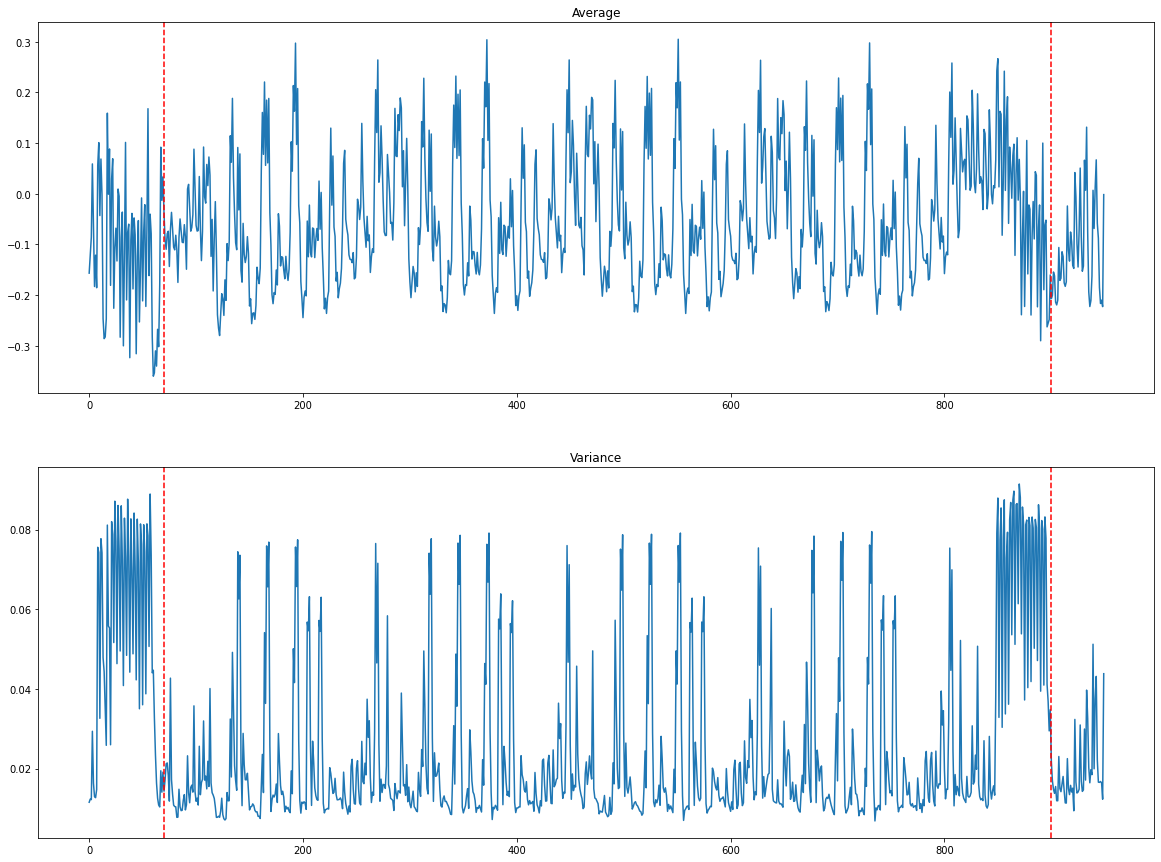

In [9]:
roiL, roiR = 1500, 2450
segL, segR = 1570, 2400
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
plt.title('Average')
plt.plot(np.average(traces, axis=0)[roiL:roiR])
plt.axvline(segL - roiL, color='r', linestyle='--')
plt.axvline(segR - roiL, color='r', linestyle='--')
plt.subplot(2, 1, 2)
plt.title('Variance')
plt.plot(np.std(traces, axis=0, ddof=1)[roiL:roiR], '-')
plt.axvline(segL - roiL, color='r', linestyle='--')
plt.axvline(segR - roiL, color='r', linestyle='--')
plt.show()

72


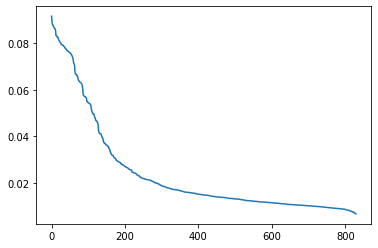

[800 795 801 780 786 794 792 798 797 818 803 783 824 812 809 815 791 807
 821 804 806 810 816 813 819 822 662 789 635 483 304 779 456 429 277 608
 785 825 250 125 782 633  98 275 454 198 302 660 481 377  96 123 556 735
 427 606  69 248  71 788 200 379 558 737 634 303 482 661 276 455 124  97
 428 607 315 249 673 684 136 505 147 494  70 326 799 568 209 313 671 422
 145 682 503 134 492 324 683 314 672 135 146 504 493 325  94 802 793 452
 745 796 761 814 121 401 479 243  64 273 658 631 817 601 378 199 300 557
 386 736   6 811 122 659 480 826 301 823 808  43 727 820 222 778 190 548
 805 602 632 827 369  95 453 790 423  28 274  65 244 829 729 629 787 781
 567  62 550 192  37 580 734 371 599 728 271 756 376 784 644 286 663 484
 828 197 305 636 457 555  74 430 107 278 465 772 609 191 685 549 251 370
 148 506 327 767 543 126 139 185 497 223 316 432 674 201  99 380 495 137
 559  33 318 241 584 364 611 738 450 722 645 713 676 287 718 253 387  92
 759 360 334  22 398 585 583 692 466 355 176 628 29

In [23]:
sig = traces[:, segL:segR]
var = np.std(sig, ddof=1, axis=0)
max_idx = len(var[var > 0.065])
print(max_idx)
var_index = np.argsort(var)[::-1]
plt.plot(var[var_index])
plt.show()
print(var_index)

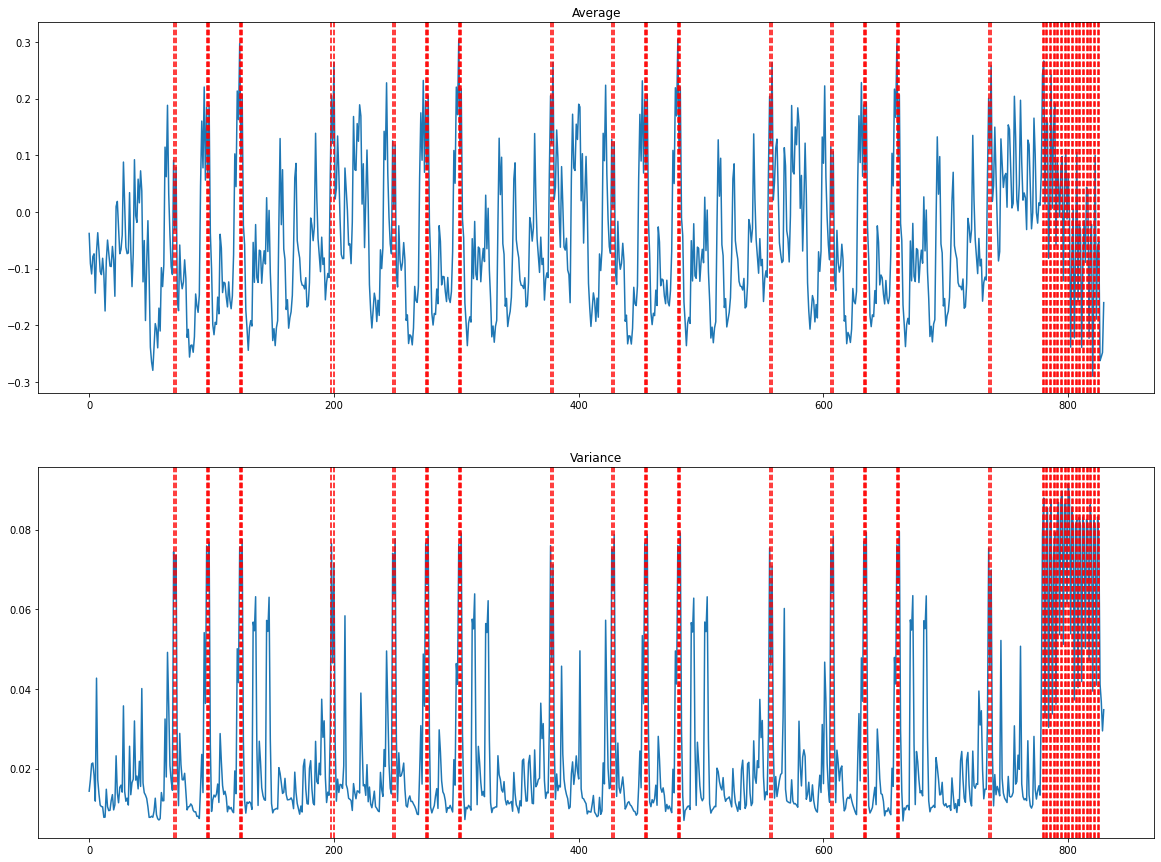

In [24]:
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
plt.title('Average')
plt.plot(np.average(traces, axis=0)[segL:segR])
for i in var_index[:max_idx]:
    plt.axvline(i, color='r', linestyle='--')
# plt.axvline(segL - roiL, color='r', linestyle='--')
# plt.axvline(segR - roiL, color='r', linestyle='--')
plt.subplot(2, 1, 2)
plt.title('Variance')
plt.plot(np.std(traces, axis=0, ddof=1)[segL:segR])
for i in var_index[:max_idx]:
    plt.axvline(i, color='r', linestyle='--')
# plt.axvline(segL - roiL, color='r', linestyle='--')
# plt.axvline(segR - roiL, color='r', linestyle='--')
plt.show()

In [25]:
np.array(sorted(var_index[:max_idx]))

array([ 69,  71,  96,  97,  98, 123, 124, 125, 198, 200, 248, 250, 275,
       276, 277, 302, 303, 304, 377, 379, 427, 429, 454, 455, 456, 481,
       482, 483, 556, 558, 606, 608, 633, 634, 635, 660, 661, 662, 735,
       737, 779, 780, 782, 783, 785, 786, 788, 789, 791, 792, 794, 795,
       797, 798, 800, 801, 803, 804, 806, 807, 809, 810, 812, 813, 815,
       816, 818, 819, 821, 822, 824, 825])

In [15]:
plt.figure(figsize=(30,10 * max_idx))
for i, idx in enumerate(sorted(var_index[:max_idx])):
    plt.subplot(max_idx, 1, i+1)
    plt.hist(sig[:,idx], bins=100)
    plt.title(idx)
plt.show()

ValueError: Image size of 2160x81360 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 2160x81360 with 113 Axes>

# XOR Analysis

In [26]:
print(var_index[:max_idx])

[800 795 801 780 786 794 792 798 797 818 803 783 824 812 809 815 791 807
 821 804 806 810 816 813 819 822 662 789 635 483 304 779 456 429 277 608
 785 825 250 125 782 633  98 275 454 198 302 660 481 377  96 123 556 735
 427 606  69 248  71 788 200 379 558 737 634 303 482 661 276 455 124  97]


In [29]:
sig = traces[:, segL: segR][:, sorted(var_index[:max_idx])]

<AxesSubplot:>

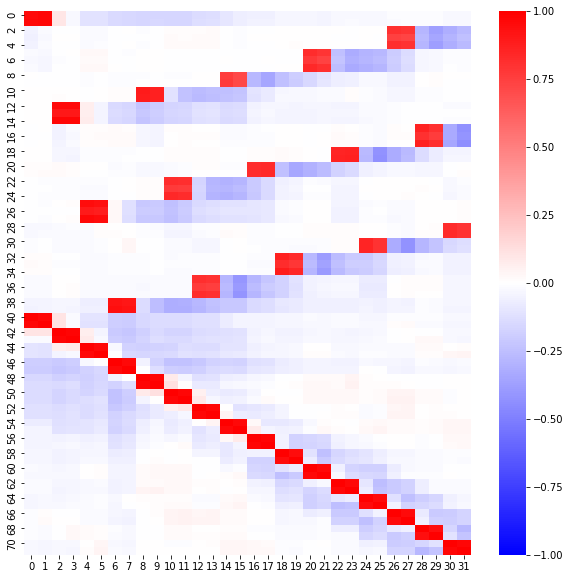

In [36]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(np.corrcoef(sig.T)[:, -32:], vmin=-1, vmax=1, cmap='bwr')

<AxesSubplot:>

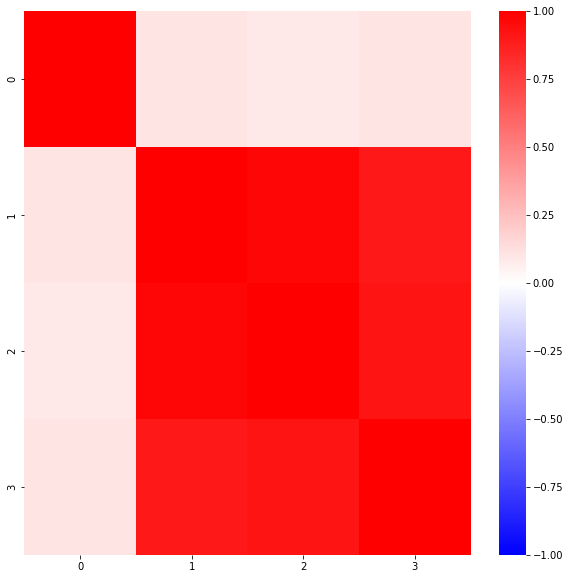

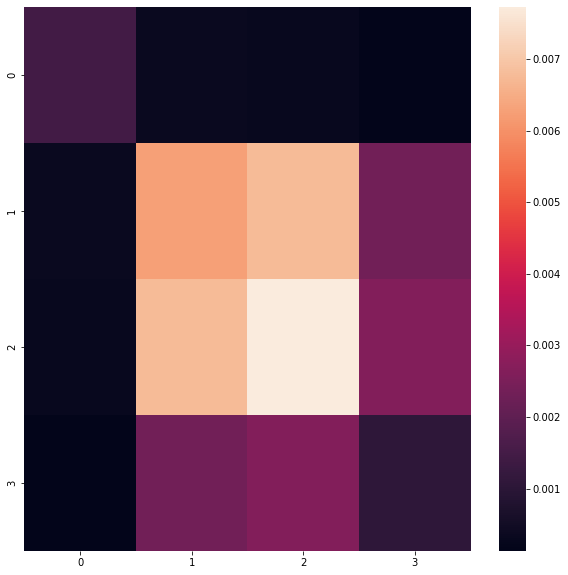

In [37]:
import seaborn as sns
heatmap_roi = slice(28, 32)
plt.figure(figsize=(10, 10))
sns.heatmap(np.corrcoef(sig.T[heatmap_roi]), vmin=-1, vmax=1, cmap='bwr')
plt.figure(figsize=(10, 10))
sns.heatmap((np.abs(np.cov(sig.T[heatmap_roi]))), )

<AxesSubplot:>

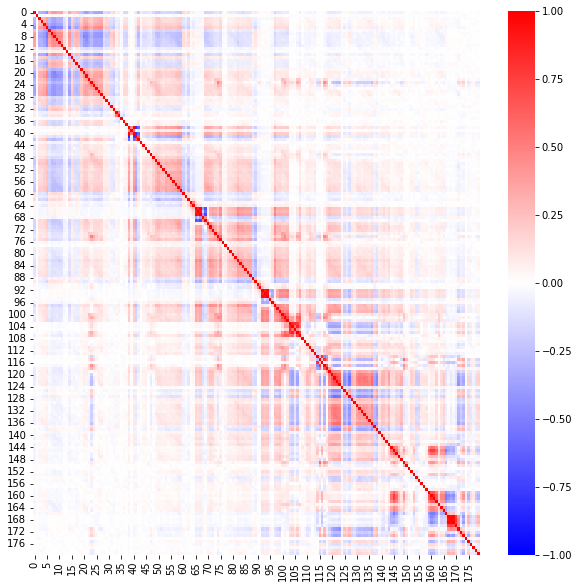

In [45]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(np.corrcoef(sig.T**2), vmin=-1, vmax=1, cmap='bwr')